#Przygotowanie danych

In [ ]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score

print(os.getcwd())

/content


In [ ]:
df = pd.read_csv('mushrooms.csv')
df.head()  #Displaying first five rows of the dataset

,type,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,poisonous,convex,smooth,brown,yes,pungent,free,close,narrow,black,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
1,edible,convex,smooth,yellow,yes,almond,free,close,broad,black,...,smooth,white,white,partial,white,one,pendant,brown,numerous,grasses
2,edible,bell,smooth,white,yes,anise,free,close,broad,brown,...,smooth,white,white,partial,white,one,pendant,brown,numerous,meadows
3,poisonous,convex,scaly,white,yes,pungent,free,close,narrow,brown,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
4,edible,convex,smooth,gray,no,none,free,crowded,broad,black,...,smooth,white,white,partial,white,one,evanescent,brown,abundant,grasses


#Modelowanie danych


In [ ]:
df.dtypes

type                        object
cap_shape                   object
cap_surface                 object
cap_color                   object
bruises                     object
odor                        object
gill_attachment             object
gill_spacing                object
gill_size                   object
gill_color                  object
stalk_shape                 object
stalk_root                  object
stalk_surface_above_ring    object
stalk_surface_below_ring    object
stalk_color_above_ring      object
stalk_color_below_ring      object
veil_type                   object
veil_color                  object
ring_number                 object
ring_type                   object
spore_print_color           object
population                  object
habitat                     object
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   type                      8124 non-null   object
 1   cap_shape                 8124 non-null   object
 2   cap_surface               8124 non-null   object
 3   cap_color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill_attachment           8124 non-null   object
 7   gill_spacing              8124 non-null   object
 8   gill_size                 8124 non-null   object
 9   gill_color                8124 non-null   object
 10  stalk_shape               8124 non-null   object
 11  stalk_root                8124 non-null   object
 12  stalk_surface_above_ring  8124 non-null   object
 13  stalk_surface_below_ring  8124 non-null   object
 14  stalk_color_above_ring  

In [ ]:
#liczenie trujących i nietrujących
df["type"].value_counts()


edible       4208
poisonous    3916
Name: type, dtype: int64

##Wizualizacja grzybów trujących i nietrujących

<Axes: ylabel='type'>

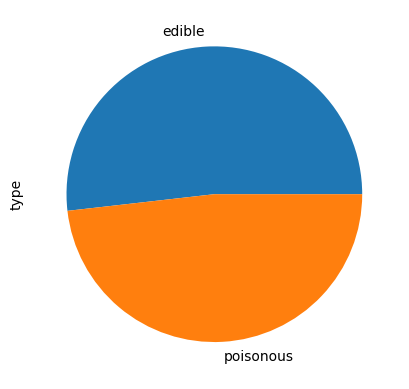

In [ ]:
df["type"].value_counts().plot(kind = 'pie')

In [ ]:
for i in df.columns:
  print(df[i].value_counts())

edible       4208
poisonous    3916
Name: type, dtype: int64
convex     3656
flat       3152
knobbed     828
bell        452
sunken       32
conical       4
Name: cap_shape, dtype: int64
scaly      3244
smooth     2556
fibrous    2320
grooves       4
Name: cap_surface, dtype: int64
brown       2284
gray        1840
red         1500
yellow      1072
white       1040
buff         168
pink         144
cinnamon      44
purple        16
green         16
Name: cap_color, dtype: int64
no     4748
yes    3376
Name: bruises, dtype: int64
none        3528
foul        2160
fishy        576
spicy        576
almond       400
anise        400
pungent      256
creosote     192
musty         36
Name: odor, dtype: int64
free        7914
attached     210
Name: gill_attachment, dtype: int64
close      6812
crowded    1312
Name: gill_spacing, dtype: int64
broad     5612
narrow    2512
Name: gill_size, dtype: int64
buff         1728
pink         1492
white        1202
brown        1048
gray          752
ch

##Użycie przy zmiennych typu object - categorical variables encoding

In [ ]:

df['type'] = df['type'].map({
    'poisonous': 1,
    'edible': 0
})
df['bruises'] = df['bruises'].map({
    'yes' : 1,
    'no': 0
})
df['gill_size_is_broad'] = df['gill_size'].map({
    'narrow' : 0,
    'broad' : 1
})
df['ring_number'] = df['ring_number'].map({
    'none' : 0,
    'one': 1,
    'two' : 2
})
df['gill_size_is_close'] = df['gill_spacing'].map({
    'close' : 1,
    'crowded' : 0
})
df['gill_attachment_is_free'] = df['gill_attachment'].map({
    'free' : 1,
    'attached' : 0
})
df['stalk_shape_is_tapering'] = df['stalk_shape'].map({
    'tapering' : 1,
    'enlarging' : 0
})



In [ ]:
df = df.drop(axis = 1, columns = ['veil_type', 'gill_size', 'gill_spacing', 'gill_attachment','stalk_shape']) #wywalenie kolumny

In [ ]:
df[df.isnull().any(axis=1)] #sprawdzeie pustych

,type,cap_shape,cap_surface,cap_color,bruises,odor,gill_color,stalk_root,stalk_surface_above_ring,stalk_surface_below_ring,...,veil_color,ring_number,ring_type,spore_print_color,population,habitat,gill_size_is_broad,gill_size_is_close,gill_attachment_is_free,stalk_shape_is_tapering


##Badanie czy rodzaj zapachu ma wpływ na typ grzyba

In [ ]:
# none        3528
# foul        2160
# fishy        576
# spicy        576
# almond       400
# anise        400
# pungent      256
# creosote     192
# musty         36
# Name: odor, dtype: int64

#sprawdzimy czy rodzaj zapachu ma wpływ na to czy grzyb jest trujący (+/- połowa nie ma zapachu)

df['is_odor'] = df['odor'].map(lambda x: 0 if x== "none" else 1)




In [ ]:
# df[df['is_odor'] == 0].head()
df[df['is_odor'] == 0]['type'].value_counts()
#nie ma odoru to dużo więcej nietrujących!!

0    3408
1     120
Name: type, dtype: int64

In [ ]:
df[df['is_odor'] == 1]['type'].value_counts()
#jest odór to dużo więcej trujących!!

1    3796
0     800
Name: type, dtype: int64

In [ ]:
df[['is_odor', 'type']].corr()

,is_odor,type
is_odor,1.000000,0.785557
type,0.785557,1.000000


##Zamiana kolorów na zmienne rgb

In [ ]:
from matplotlib.colors import to_rgb

In [ ]:
df['veil_color_r'] = df['veil_color'].map(lambda x: to_rgb(x)[0])
df['veil_color_g'] = df['veil_color'].map(lambda x: to_rgb(x)[1])
df['veil_color_b'] = df['veil_color'].map(lambda x: to_rgb(x)[2])


In [ ]:
#df['veil_color_avg'] = df['veil_color'].map(lambda x: sum(to_rgb(x))/3)

In [ ]:
def map_colors(x):
 return list(to_rgb("lightyellow")) if x == 'buff' else list(to_rgb("peru")) if x == "cinnamon" else list(to_rgb(x))

In [ ]:
df[['cap_color_r','cap_color_g', 'cap_color_b']]=df.apply(lambda row: map_colors(row['cap_color']), result_type='expand', axis=1)
df[['gill_color_r','gill_color_g', 'gill_color_b']]=df.apply(lambda row: map_colors(row['gill_color']), result_type='expand', axis=1)
df[['stalk_color_above_ringr_r','stalk_color_above_ring_g', 'stalk_color_above_ring_b']]=df.apply(lambda row: map_colors(row['stalk_color_above_ring']), result_type='expand', axis=1)
df[['stalk_color_below_ringr_r','stalk_color_below_ring_g', 'stalk_color_below_ring_b']]=df.apply(lambda row: map_colors(row['stalk_color_below_ring']), result_type='expand', axis=1)
df[['spore_print_color_r','spore_print_color_g', 'spore_print_color_b']]=df.apply(lambda row: map_colors(row['spore_print_color']), result_type='expand', axis=1)

In [ ]:
df = df.drop(axis = 1, columns = ['odor','veil_color','cap_color', 'gill_color', 'stalk_color_above_ring', 'stalk_color_below_ring','spore_print_color']) #wywalenie kolumny

<Axes: xlabel='type,habitat'>

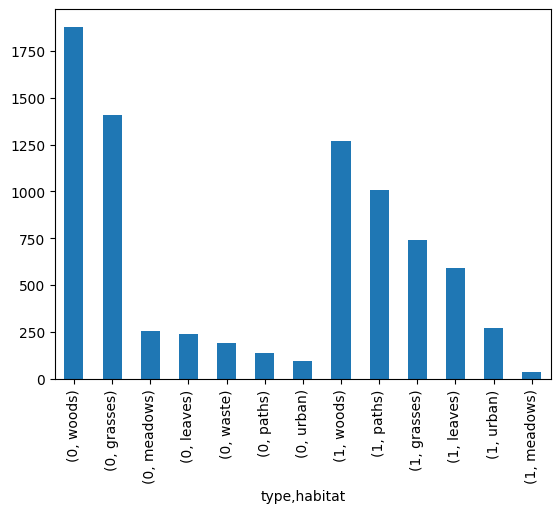

In [ ]:
df.groupby('type')['habitat'].value_counts().plot(kind='bar')

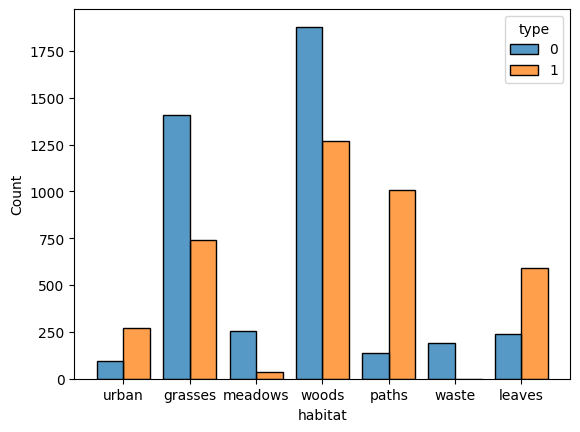

In [ ]:
g = sns.histplot(
    data=df,
    x="habitat", hue="type",multiple="dodge", shrink=.8
)

<ipython-input-23-9c4dd2d6d639>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)


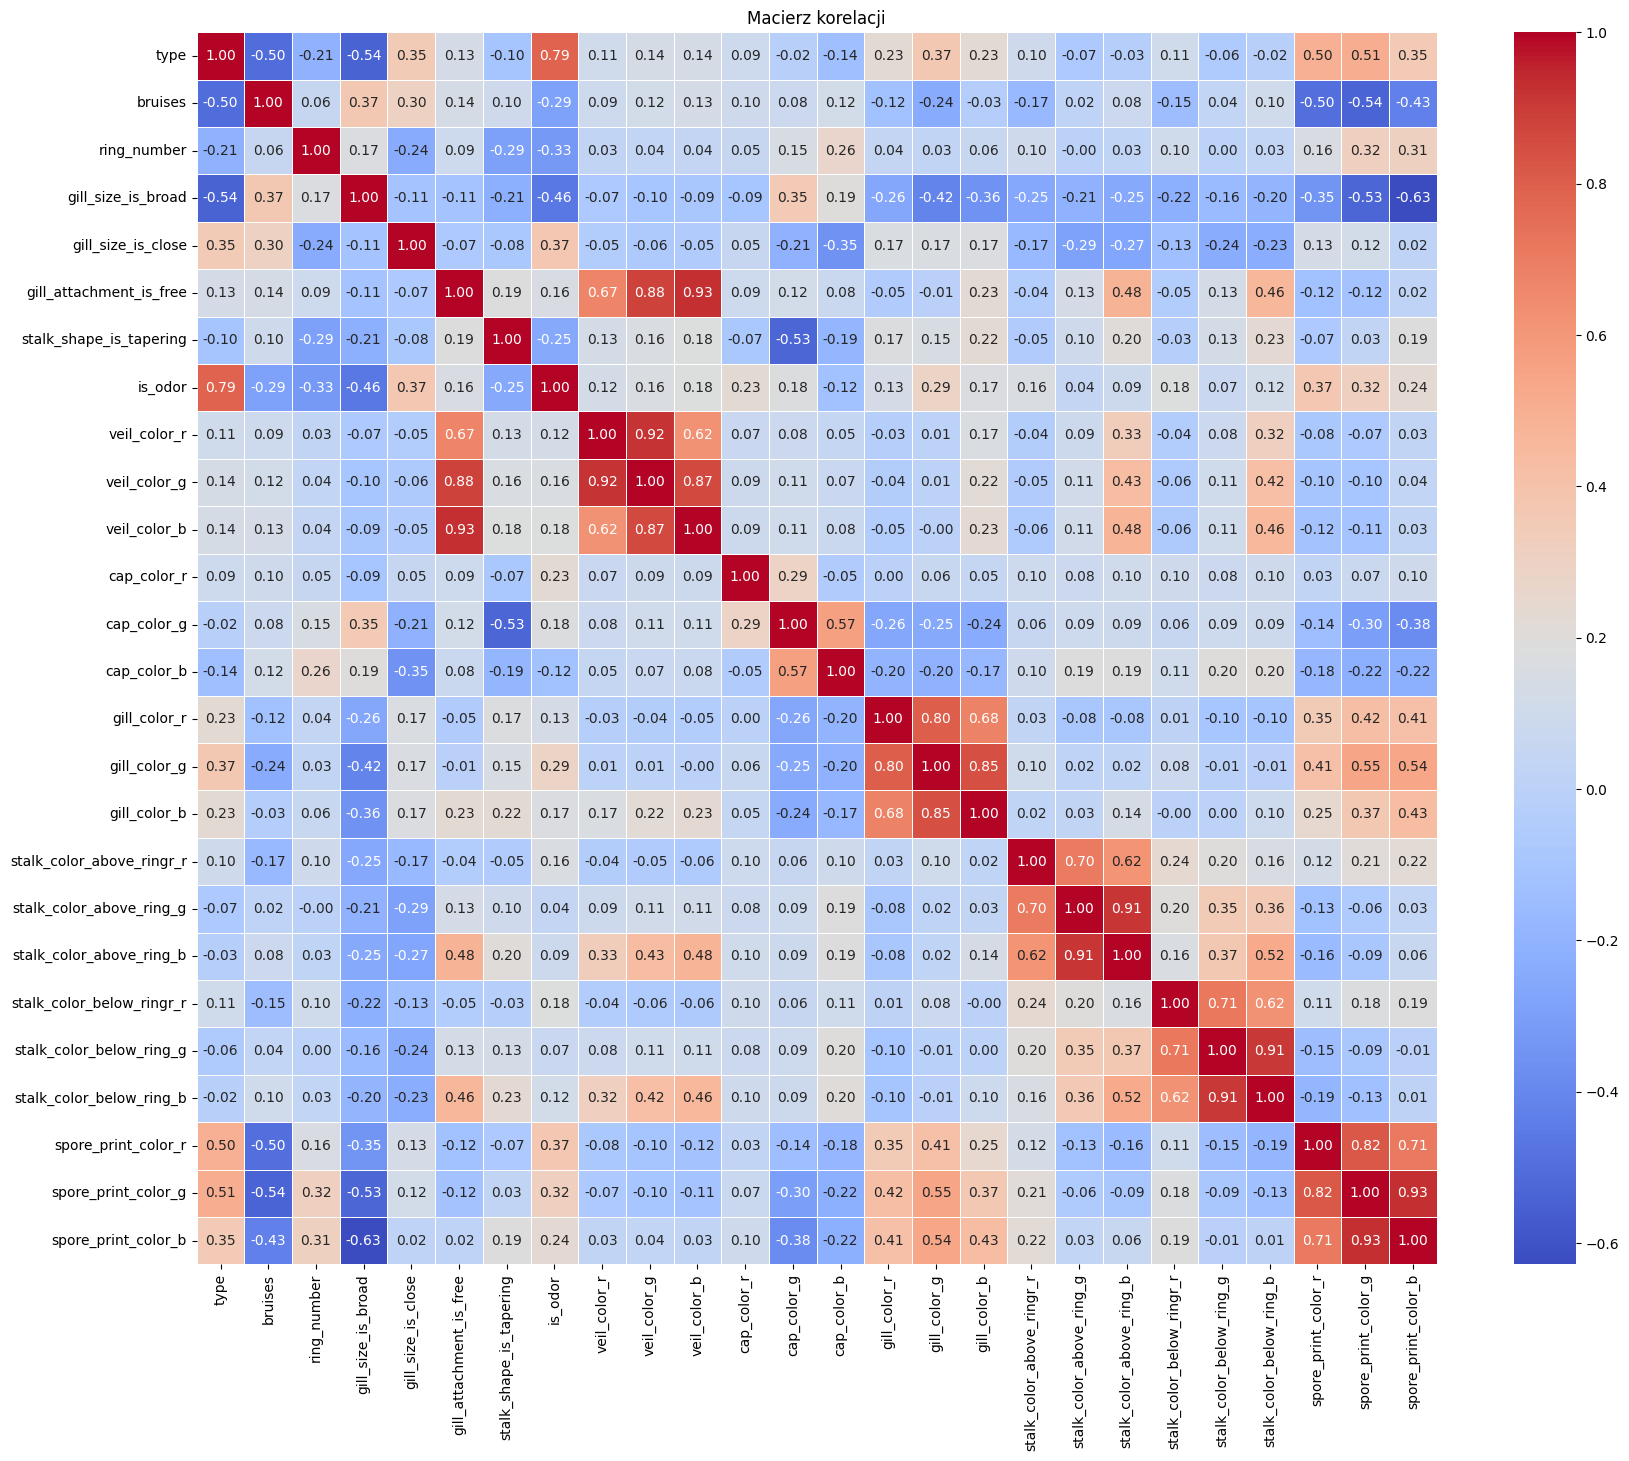

In [ ]:

# Tworzenie wykresu korelacji
plt.figure(figsize=(20, 16))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Macierz korelacji')
plt.show()

##Badanie pozostałych danych

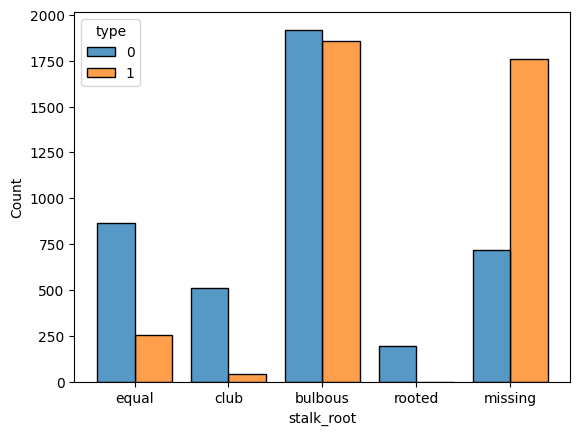

In [ ]:
g = sns.histplot(
    data=df,
    x="stalk_root", hue="type",multiple="dodge", shrink=.8
)
#dużo danych oznaczonych jako "missing", nie należy ich brać pod uwagę

df = df.drop("stalk_root",axis = 1)

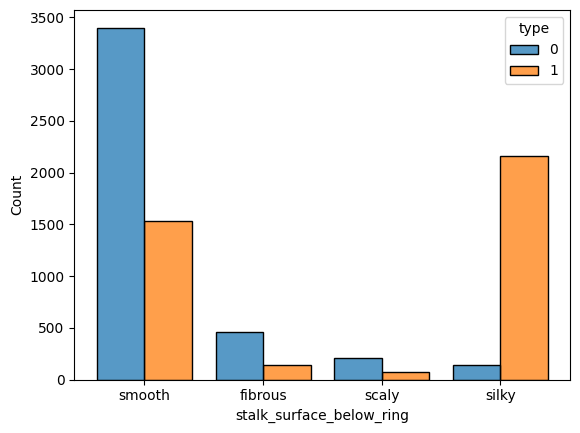

In [ ]:
g = sns.histplot(
    data=df,
    x="stalk_surface_below_ring", hue="type",multiple="dodge", shrink=.8
)
#uogólniamy dane jedynie do is_smooth i is_silky

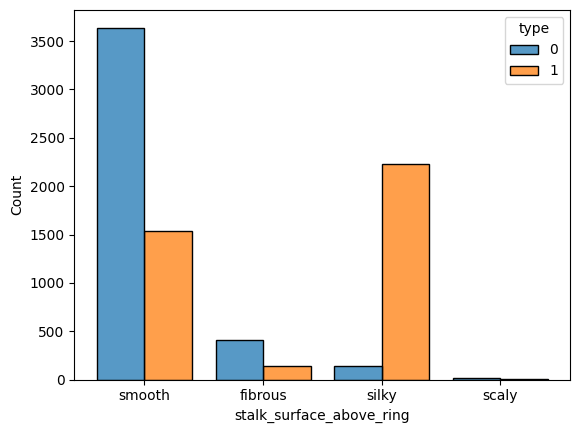

In [ ]:
g = sns.histplot(
    data=df,
    x="stalk_surface_above_ring", hue="type",multiple="dodge", shrink=.8
)
#uogólniamy dane jedynie do is_smooth i is_silky

In [ ]:
df['stalk_surface_above_ring_is_smooth'] = df['stalk_surface_above_ring'].map(
    lambda x: 1 if x == "smooth" else 0
)
df['stalk_surface_above_ring_is_silky'] = df['stalk_surface_above_ring'].map(
    lambda x: 1 if x == "silky" else 0
)
df['stalk_surface_below_ring_is_smooth'] = df['stalk_surface_below_ring'].map(
    lambda x: 1 if x == "smooth" else 0
)
df['stalk_surface_below_ring_is_silky'] = df['stalk_surface_below_ring'].map(
    lambda x: 1 if x == "silky" else 0
)

In [ ]:
df = df.drop(["stalk_surface_below_ring","stalk_surface_above_ring"], axis = 1)

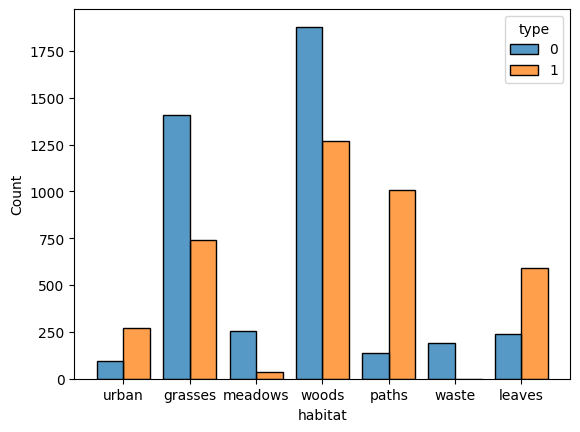

In [ ]:
g = sns.histplot(
    data=df,
    x="habitat", hue="type",multiple="dodge", shrink=.8
)

In [ ]:
df['habitat_is_urban'] = df['habitat'].map(
    lambda x: 1 if x == "urban" else 0
)
df['habitat_is_grasses'] = df['habitat'].map(
    lambda x: 1 if x == "grasses" else 0
)
df['habitat_is_meadows'] = df['habitat'].map(
    lambda x: 1 if x == "meadows" else 0
)
df['habitat_is_woods'] = df['habitat'].map(
    lambda x: 1 if x == "woods" else 0
)
df['habitat_is_paths'] = df['habitat'].map(
    lambda x: 1 if x == "paths" else 0
)
df['habitat_is_waste'] = df['habitat'].map(
    lambda x: 1 if x == "waste" else 0
)
df['habitat_is_leaves'] = df['habitat'].map(
    lambda x: 1 if x == "leaves" else 0
)
df['population_is_scattered'] = df['population'].map(
    lambda x: 1 if x == "scattered" else 0
)
df['population_is_numerous'] = df['population'].map(
    lambda x: 1 if x == "numerous" else 0
)
df['population_is_abundant'] = df['population'].map(
    lambda x: 1 if x == "abundant" else 0
)
df['population_is_several'] = df['population'].map(
    lambda x: 1 if x == "several" else 0
)
df['population_is_solitary'] = df['population'].map(
    lambda x: 1 if x == "solitary" else 0
)
df['population_is_clustered'] = df['population'].map(
    lambda x: 1 if x == "clustered" else 0
)

df['ring_type_is_pendant'] = df['ring_type'].map(
    lambda x: 1 if x == "pendant" else 0
)
df['ring_type_is_evanescent'] = df['ring_type'].map(
    lambda x: 1 if x == "evanescent" else 0
)
df['ring_type_is_large'] = df['ring_type'].map(
    lambda x: 1 if x == "large" else 0
)
df['ring_type_is_flaring'] = df['ring_type'].map(
    lambda x: 1 if x == "flaring" else 0
)
df['ring_type_is_none'] = df['ring_type'].map(
    lambda x: 1 if x == "none" else 0
)
df['cap_surface_is_smooth'] = df['cap_surface'].map(
    lambda x: 1 if x == "smooth" else 0
)
df['cap_surface_is_scaly'] = df['cap_surface'].map(
    lambda x: 1 if x == "scaly" else 0
)
df['cap_surface_is_fibrous'] = df['cap_surface'].map(
    lambda x: 1 if x == "fibrous" else 0
)
df['cap_surface_is_grooves'] = df['cap_surface'].map(
    lambda x: 1 if x == "grooves" else 0
)
df['cap_shape_is_convex'] = df['cap_shape'].map(
    lambda x: 1 if x == "convex" else 0
)
df['cap_shape_is_bell'] = df['cap_shape'].map(
    lambda x: 1 if x == "bell" else 0
)
df['cap_shape_is_sunken'] = df['cap_shape'].map(
    lambda x: 1 if x == "sunken" else 0
)
df['cap_shape_is_flat'] = df['cap_shape'].map(
    lambda x: 1 if x == "flat" else 0
)
df['cap_shape_is_knobbed'] = df['cap_shape'].map(
    lambda x: 1 if x == "knobbed" else 0
)
df['cap_shape_is_conical'] = df['cap_shape'].map(
    lambda x: 1 if x == "conical" else 0
)

In [ ]:
df = df.drop(["cap_shape","cap_surface","ring_type","population","habitat"], axis = 1)

##Ostateczne wypisanie danych i ich typów po zmianach

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 58 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   type                                8124 non-null   int64  
 1   bruises                             8124 non-null   int64  
 2   ring_number                         8124 non-null   int64  
 3   gill_size_is_broad                  8124 non-null   int64  
 4   gill_size_is_close                  8124 non-null   int64  
 5   gill_attachment_is_free             8124 non-null   int64  
 6   stalk_shape_is_tapering             8124 non-null   int64  
 7   is_odor                             8124 non-null   int64  
 8   veil_color_r                        8124 non-null   float64
 9   veil_color_g                        8124 non-null   float64
 10  veil_color_b                        8124 non-null   float64
 11  cap_color_r                         8124 no

##Macierz korelacji danych

In [ ]:
# Tworzenie wykresu korelacji
plt.figure(figsize=(60, 60))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Macierz korelacji')
plt.show()

NameError: name 'df' is not defined

<Figure size 6000x6000 with 0 Axes>

# Modelowanie, podział danych na set treningowy i testowy




In [ ]:
DF = df.select_dtypes(include='number')

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
y=DF['type']
X = DF.iloc[:,1:]

NameError: name 'DF' is not defined

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
KNN = KNeighborsClassifier(n_neighbors=5)
KNN.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_train_pred = KNN.predict(X_train)
accuracy_knn_train = accuracy_score(y_train, y_train_pred) # acc na treningowym
y_test_pred_knn = KNN.predict(X_test)
accuracy_knn =accuracy_score(y_test,y_test_pred_knn)

In [ ]:
accuracy_knn

0.9963076923076923

##Confusion matrix KNN

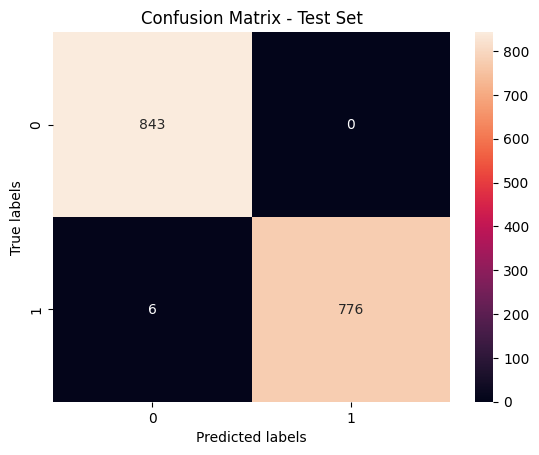

In [ ]:
cm=confusion_matrix(y_test, y_test_pred_knn)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix - Test Set');

##Cross-validation

In [ ]:
from sklearn.model_selection import cross_val_score
# liczba sąsiadów do testów
k_values = np.arange(1, 21, 1)

# Cross-validation
cv_scores = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(np.mean(scores))

##Wykres zależności accuracy względem liczby sąsiadów (k)

Najlepsza wartość k: 1


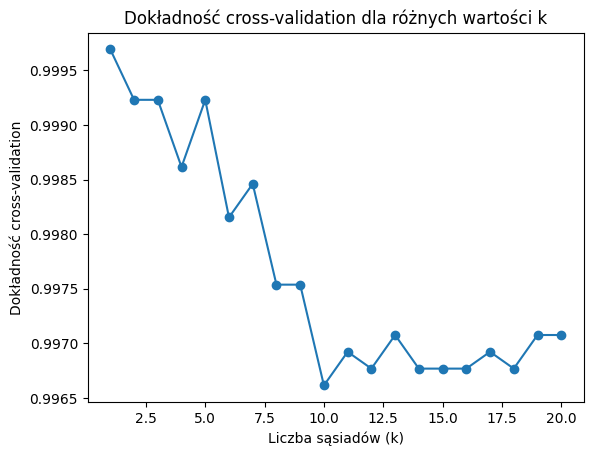

In [ ]:
best_k = k_values[np.argmax(cv_scores)]
print("Najlepsza wartość k:", best_k)
# wizualizacja
plt.plot(k_values, cv_scores, marker='o')
plt.title('Dokładność cross-validation dla różnych wartości k')
plt.xlabel('Liczba sąsiadów (k)')
plt.ylabel('Dokładność cross-validation')
plt.show()

#SVM

In [ ]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)

NameError: name 'X_train' is not defined

In [ ]:
y_test_pred_svm = svc.predict(X_test)

accuracy_svm = accuracy_score(y_test,y_test_pred_svm)

In [ ]:
accuracy_svm

1.0

##Confusion matrix dla SVM

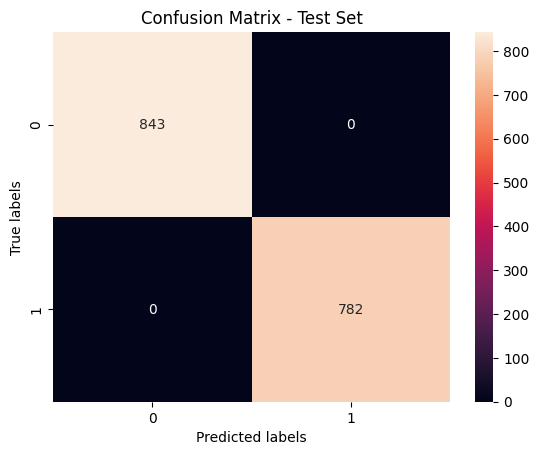

In [ ]:
cm=confusion_matrix(y_test, y_test_pred_svm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix - Test Set');

#DRZEWO DECYZYJNE

##Wizualizacja drzewa decyzyjnego

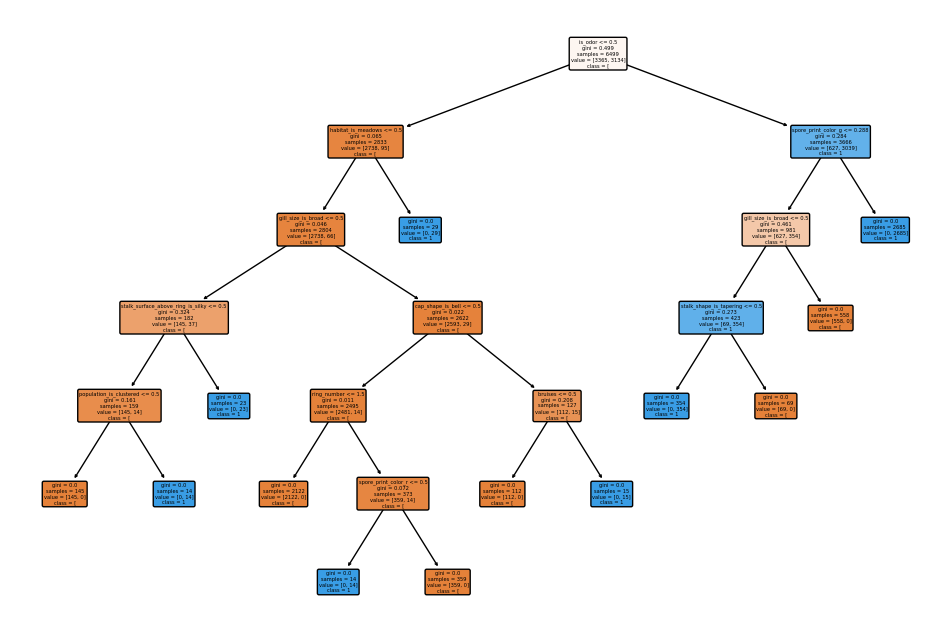

Reguły decyzyjne:
|--- is_odor <= 0.50
|   |--- habitat_is_meadows <= 0.50
|   |   |--- gill_size_is_broad <= 0.50
|   |   |   |--- stalk_surface_above_ring_is_silky <= 0.50
|   |   |   |   |--- population_is_clustered <= 0.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- population_is_clustered >  0.50
|   |   |   |   |   |--- class: 1
|   |   |   |--- stalk_surface_above_ring_is_silky >  0.50
|   |   |   |   |--- class: 1
|   |   |--- gill_size_is_broad >  0.50
|   |   |   |--- cap_shape_is_bell <= 0.50
|   |   |   |   |--- ring_number <= 1.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- ring_number >  1.50
|   |   |   |   |   |--- spore_print_color_r <= 0.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- spore_print_color_r >  0.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |--- cap_shape_is_bell >  0.50
|   |   |   |   |--- bruises <= 0.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- bruises >  0.50
|   |   |   |   |   |--- class:

In [ ]:
# Importowanie niezbędnych bibliotek
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn import tree

# Iinicjalizacja i trening
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# drzewo decyzyjne
fig, ax = plt.subplots(figsize=(12, 8))
tree.plot_tree(clf, feature_names=X.columns, class_names = str(df['type'].unique()), filled=True, rounded=True)
plt.show()

# reguły decyzyjne
r = export_text(clf, feature_names=X.columns.tolist())
print("Reguły decyzyjne:")
print(r)

In [ ]:
y_test_pred_dt = clf.predict(X_test)
accuracy_dt =accuracy_score(y_test,y_test_pred_dt)

##Confusion matrix DT

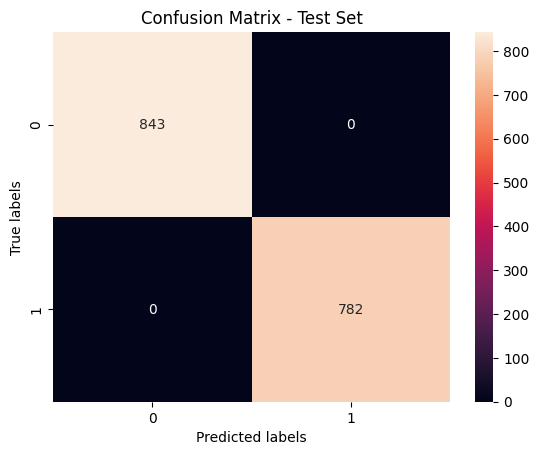

In [ ]:
cm=confusion_matrix(y_test, y_test_pred_dt)

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix - Test Set');

#Podsumowanie

In [ ]:
print(f'Dokładność KNN: {accuracy_knn:.2f}')
print(f'Dokładność SVM: {accuracy_svm:.2f}')
print(f'Dokładność Decision Tree: {accuracy_dt:.2f}')

# Porównanie raportów klasyfikacji
print('\nRaport klasyfikacji dla KNN:')
print(classification_report(y_test, y_test_pred_knn))

print('\nRaport klasyfikacji dla SVC:')
print(classification_report(y_test, y_test_pred_svm))

print('\nRaport klasyfikacji dla Decision Tree:')
print(classification_report(y_test, y_test_pred_dt))

Dokładność KNN: 1.00
Dokładność SVM: 1.00
Dokładność Decision Tree: 1.00

Raport klasyfikacji dla KNN:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       843
           1       1.00      0.99      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625


Raport klasyfikacji dla SVC:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625


Raport klasyfikacji dla Decision Tree:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accur

#Test

##Zmniejszenie kolumn (pozostawienie tylko tych w których korelacja z 'type' jest > 0.5)



In [ ]:
df.columns

Index(['type', 'bruises', 'ring_number', 'gill_size_is_broad',
       'gill_size_is_close', 'gill_attachment_is_free',
       'stalk_shape_is_tapering', 'is_odor', 'veil_color_r', 'veil_color_g',
       'veil_color_b', 'cap_color_r', 'cap_color_g', 'cap_color_b',
       'gill_color_r', 'gill_color_g', 'gill_color_b',
       'stalk_color_above_ringr_r', 'stalk_color_above_ring_g',
       'stalk_color_above_ring_b', 'stalk_color_below_ringr_r',
       'stalk_color_below_ring_g', 'stalk_color_below_ring_b',
       'spore_print_color_r', 'spore_print_color_g', 'spore_print_color_b',
       'stalk_surface_above_ring_is_smooth',
       'stalk_surface_above_ring_is_silky',
       'stalk_surface_below_ring_is_smooth',
       'stalk_surface_below_ring_is_silky', 'habitat_is_urban',
       'habitat_is_grasses', 'habitat_is_meadows', 'habitat_is_woods',
       'habitat_is_paths', 'habitat_is_waste', 'habitat_is_leaves',
       'population_is_scattered', 'population_is_numerous',
       'populatio

In [ ]:
df.corr()

,type,bruises,ring_number,gill_size_is_broad,gill_size_is_close,gill_attachment_is_free,stalk_shape_is_tapering,is_odor,veil_color_r,veil_color_g,...,cap_surface_is_smooth,cap_surface_is_scaly,cap_surface_is_fibrous,cap_surface_is_grooves,cap_shape_is_convex,cap_shape_is_bell,cap_shape_is_sunken,cap_shape_is_flat,cap_shape_is_knobbed,cap_shape_is_conical
type,1.000000,-0.501530,-0.214366,-0.540024,0.348387,0.129200,-0.102019,0.785557,0.105491,0.138828,...,0.095454,0.088677,-0.195415,0.023007,-0.026886,-0.182567,-0.060664,0.018526,0.163565,0.023007
bruises,-0.501530,1.000000,0.056788,0.369596,0.299473,0.137359,0.099364,-0.285171,0.092210,0.121350,...,-0.104439,0.124401,-0.028808,0.026321,0.048557,0.115686,-0.053026,0.045188,-0.229578,0.003803
ring_number,-0.214366,0.056788,1.000000,0.171362,-0.243014,0.093236,-0.293221,-0.325325,0.028009,0.036860,...,0.119852,-0.097559,-0.017156,-0.005685,-0.078334,0.207275,-0.016107,-0.103283,0.141875,-0.005685
gill_size_is_broad,-0.540024,0.369596,0.171362,1.000000,-0.108333,-0.108984,-0.214576,-0.457211,-0.073162,-0.096282,...,-0.198257,-0.048362,0.257889,-0.033174,0.056995,0.148449,-0.093993,0.075766,-0.306333,-0.033174
gill_size_is_close,0.348387,0.299473,-0.243014,-0.108333,1.000000,-0.071489,-0.080895,0.371333,-0.047991,-0.063157,...,-0.152145,0.333229,-0.202414,-0.050573,-0.033328,-0.039406,0.027598,0.039154,0.019591,-0.050573
gill_attachment_is_free,0.129200,0.137359,0.093236,-0.108984,-0.071489,1.000000,0.186485,0.157755,0.671306,0.883450,...,-0.210358,0.104304,0.102989,0.003615,0.063156,-0.122896,0.010244,0.043740,-0.083575,0.003615
stalk_shape_is_tapering,-0.102019,0.099364,-0.293221,-0.214576,-0.080895,0.186485,1.000000,-0.248052,0.125188,0.164750,...,0.071806,-0.056826,-0.010958,-0.025409,-0.028821,-0.277873,-0.071991,0.116324,0.087332,-0.025409
is_odor,0.785557,-0.285171,-0.325325,-0.457211,0.371333,0.157755,-0.248052,1.000000,0.124812,0.164255,...,0.125137,0.146425,-0.286171,-0.025332,0.015817,0.000314,-0.071775,-0.066856,0.098152,-0.025332
veil_color_r,0.105491,0.092210,0.028009,-0.073162,-0.047991,0.671306,0.125188,0.124812,1.000000,0.920447,...,-0.161399,0.089158,0.069137,0.002427,0.043967,-0.092724,0.006877,0.030966,-0.053523,0.002427
veil_color_g,0.138828,0.121350,0.036860,-0.096282,-0.063157,0.883450,0.164750,0.164255,0.920447,1.000000,...,-0.212404,0.117334,0.090986,0.003194,0.057861,-0.122026,0.009050,0.040751,-0.070437,0.003194


In [ ]:
#wybieramy tylko te kolumny z korelacją względem type > 0.5
correlation_with_type = df.corrwith(df['type'])
threshold = 0.5
high_correlation_columns = correlation_with_type[abs(correlation_with_type) > threshold].index
df_high_corr = df[high_correlation_columns]
print(df_high_corr)


NameError: name 'df' is not defined

##Podział nowych danych na set treningowy i testowy

In [ ]:
df_new = df_high_corr.select_dtypes(include='number')

NameError: name 'df_high_corr' is not defined

In [ ]:
y_new=df_new['type']
X_new = df_new.iloc[:,1:]

NameError: name 'df_new' is not defined

In [ ]:
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, test_size=0.2, random_state=42)


##Klasyfikacja na nowych danych

###KNN

In [ ]:
KNN = KNeighborsClassifier(n_neighbors=5)
KNN.fit(X_train_new, y_train_new)
y_test_pred_knn_new = KNN.predict(X_test_new)
accuracy_knn_new =accuracy_score(y_test,y_test_pred_knn_new)

In [ ]:
accuracy_knn_new

0.9827692307692307

####Confusion matrix KNN new

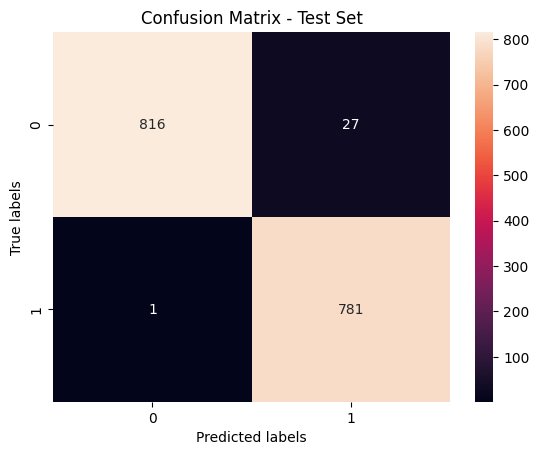

In [ ]:
cm=confusion_matrix(y_test, y_test_pred_knn_new)

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix - Test Set');

###SVM

In [ ]:
svc.fit(X_train_new, y_train_new)

SVC()

In [ ]:
y_test_pred_svm_new = svc.predict(X_test_new)

accuracy_svm_new = accuracy_score(y_test,y_test_pred_svm_new)

NameError: name 'X_test_new' is not defined

In [ ]:
accuracy_svm_new

0.9784615384615385

####Confusion matrix SVM new

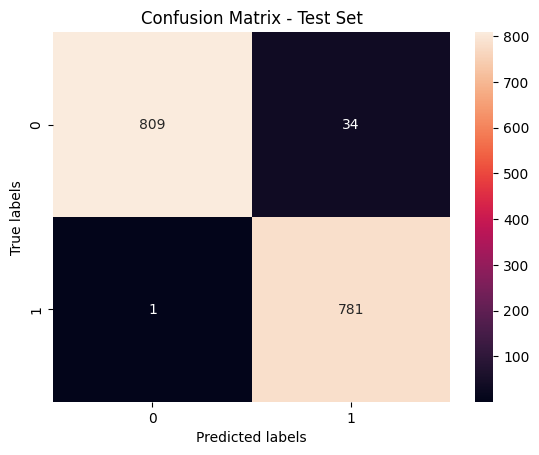

In [ ]:
cm=confusion_matrix(y_test, y_test_pred_svm_new)

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix - Test Set');

###DT

In [ ]:
clf.fit(X_train_new, y_train_new)
y_test_pred_dt_new = clf.predict(X_test_new)
accuracy_dt_new =accuracy_score(y_test,y_test_pred_dt_new)

In [ ]:
accuracy_dt_new

0.9827692307692307

####Confusion matrix DT new

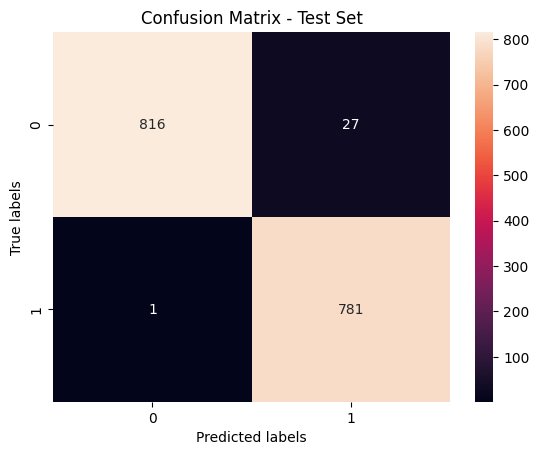

In [ ]:
cm=confusion_matrix(y_test, y_test_pred_dt_new)

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix - Test Set');

##Podsumowanie testu

In [ ]:
print(f'Dokładność KNN: {accuracy_knn_new:.4f}')
print(f'Dokładność SVM: {accuracy_svm_new:.4f}')
print(f'Dokładność Decision Tree: {accuracy_dt_new:.4f}')

# Porównanie raportów klasyfikacji
print('\nRaport klasyfikacji dla KNN:')
print(classification_report(y_test, y_test_pred_knn_new))

print('\nRaport klasyfikacji dla SVC:')
print(classification_report(y_test, y_test_pred_svm_new))

print('\nRaport klasyfikacji dla Decision Tree:')
print(classification_report(y_test, y_test_pred_dt_new))

Dokładność KNN: 0.9828
Dokładność SVM: 0.9785
Dokładność Decision Tree: 0.9828

Raport klasyfikacji dla KNN:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98       843
           1       0.97      1.00      0.98       782

    accuracy                           0.98      1625
   macro avg       0.98      0.98      0.98      1625
weighted avg       0.98      0.98      0.98      1625


Raport klasyfikacji dla SVC:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       843
           1       0.96      1.00      0.98       782

    accuracy                           0.98      1625
   macro avg       0.98      0.98      0.98      1625
weighted avg       0.98      0.98      0.98      1625


Raport klasyfikacji dla Decision Tree:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98       843
           1       0.97      1.00      0.98       782

   

Podsumowując nawet po zmniejszeniu danych o ok. 86% modele osiągnęły wysoką skuteczność na tym samym zbiorze testowym. Co istotne, podczas pomyłek modele częściej (średnio 30 przypadków) przewidywały, że grzyb będzie trujący podczas gdy nie był, a przypadek odwrotny (określił grzyb trujący jako nietrujący) pojawił się zaledwie raz w każdym z nich.